In [81]:
import pandas as pd 
from sklearn.feature_selection import RFECV
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import warnings
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D


In [68]:
data = pd.read_csv('/Users/ankitkothari/Documents/ensembel/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [69]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [32]:
X = data[['V27', 'V4', 'V10', 'V14', 'V28', 'V20', 'V21', 'V16', 'V13', 'V24']]
y = data['Class']

In [33]:
X.head()

,V27,V4,V10,V14,V28,V20,V21,V16,V13,V24
0,0.133558,1.378155,0.090794,-0.311169,-0.021053,0.251412,-0.018307,-0.470401,-0.991390,0.066928
1,-0.008983,0.448154,-0.166974,-0.143772,0.014724,-0.069083,-0.225775,0.463917,0.489095,-0.339846
2,-0.055353,0.379780,0.207643,-0.165946,-0.059752,0.524980,0.247998,-2.890083,0.717293,-0.689281
3,0.062723,-0.863291,-0.054952,-0.287924,0.061458,-0.208038,-0.108300,-1.059647,0.507757,-1.175575
4,0.219422,0.403034,0.753074,-1.119670,0.215153,0.408542,-0.009431,-0.451449,1.345852,0.141267


In [39]:
X= data[['V27', 'V4', 'V10', 'V14', 'V28', 'V20', 'V21', 'V16', 'V13', 'V24']]
X = X.loc[:,:].apply(lambda x: round(x,2))
mm_scaler = preprocessing.StandardScaler()
X.columns
X[['V27', 'V4', 'V10', 'V14', 'V28', 'V20', 'V21', 'V16', 'V13', 'V24']] = mm_scaler.fit_transform(X[['V27', 'V4', 'V10', 'V14', 'V28', 'V20', 'V21', 'V16', 'V13', 'V24']])


In [40]:
X.head()

,V27,V4,V10,V14,V28,V20,V21,V16,V13,V24
0,0.322064,0.974668,0.082659,-0.323391,-0.060580,0.324273,-0.027232,-0.536365,-0.994706,0.115571
1,-0.024772,0.317827,-0.156125,-0.146050,0.030300,-0.090809,-0.313132,0.524966,0.492316,-0.561385
2,-0.148642,0.268388,0.192867,-0.177345,-0.181754,0.674499,0.340354,-3.298108,0.723408,-1.139274
3,0.148646,-0.607399,-0.045917,-0.302528,0.181767,-0.272408,-0.149761,-1.209683,0.512411,-1.948319
4,0.545031,0.282513,0.688803,-1.168370,0.666463,0.531815,-0.013618,-0.513541,1.356397,0.231149


In [41]:
def logist_regression(X_sampling, y_sampling, sampling_type,XR_test, yR_test):
   
   #### logistic regression part and grid search 
   lr7 = LogisticRegression()
   penalty = ['l1', 'l2']
   C = [0.001,0.01,0.1,1,10,100]
   hyperparameters = dict(C=C, penalty=penalty)
   gridsearch = GridSearchCV(lr7, hyperparameters, cv=3, verbose=1)
   best_model_gs = gridsearch.fit(X_sampling, y_sampling)
   predictions7 = best_model_gs.predict(XR_test)

   #### printing the right metrics
   print(metrics.classification_report(yR_test,predictions7))
   print(metrics.confusion_matrix(yR_test,predictions7))
    
    
   #### plotting the sampling distribution
   datafra = pd.DataFrame(data=y_sampling, index=range(len(y_sampling)), columns=['Class'])
   datafra.Class.value_counts().index 
   #fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, sharey=False,figsize=[12,12])
   fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharex=False, sharey=False,figsize=[12,4])
   sns.barplot(x=datafra.Class.value_counts().index, y=datafra.Class.value_counts(), data=datafra, ax = ax1)
   
   ####plotting the heatmap for confusion matrix
   metric = metrics.confusion_matrix(yR_test,predictions7)
   confusion_dataframe = pd.DataFrame(data=metric, index=['Actual_Positive','Actual_Negative'], columns=['Guessed_Positive', 'Guessed_Negative'])
   #confusion_dataframe
   sns.heatmap(confusion_dataframe, annot=True, fmt="d", cmap="YlGnBu", ax = ax2)
   
    
   #### plotting the ROC and AUC curve
   fpr, tpr, _ = (metrics.roc_curve(yR_test,predictions7))
   ax3.plot(fpr, tpr)
   roc_auc = auc(fpr, tpr)
   ax3.plot([0, 1], [0, 1], 'k--', label='AUC = %0.3f'% roc_auc)
   ax3.legend(loc='lower right')
   ax3.plot([0,1],[0,1],'r--')
   ax3.set_xlim([-0.1,1.0])
   ax3.set_ylim([-0.1,1.01])
   ax3.set_ylabel('True Positive Rate')
   ax3.set_xlabel('False Positive Rate')
   plt.tight_layout()
   plt.show()
   print(f'Area Under the Curve: {round(roc_auc,2)}')

In [43]:
XN_train, XN_test, yN_train, yN_test = train_test_split(X, y, test_size=0.33, random_state=42)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     93838
           1       0.05      0.91      0.09       149

    accuracy                           0.97     93987
   macro avg       0.52      0.94      0.54     93987
weighted avg       1.00      0.97      0.98     93987

[[90997  2841]
 [   13   136]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.0s finished


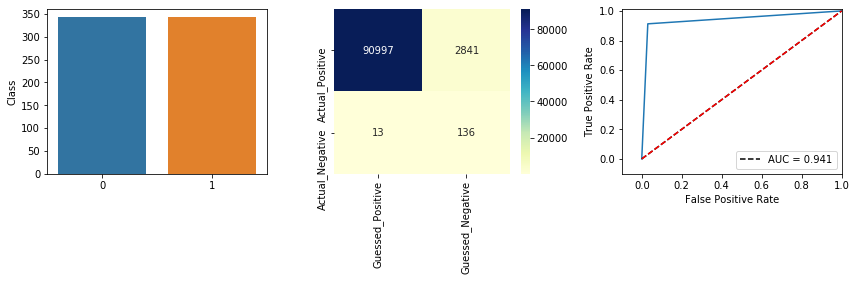

Area Under the Curve: 0.94


In [115]:
rus = RandomUnderSampler(random_state=0)
rus.fit(XN_train, yN_train)
X_smn, y_smn = rus.fit_resample(XN_train, yN_train)

logist_regression(X_smn, y_smn, "RANDOM UNDER-sampling",XN_test, yN_test)

In [ ]:
######EFFECT OF PCA ON MODEL PERFORMANCE

In [144]:
pca = PCA(.99)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

In [145]:
principalDf.head()

,principal_component_1,principal_component_2
0,0.125725,-0.479107
1,0.386067,0.531411
2,0.324796,-0.044122
3,0.995606,1.076000
4,0.113791,0.677320


In [146]:
finalDf = pd.concat([principalDf, data['Class']], axis = 1)

In [147]:
finalDf.head()

,principal_component_1,principal_component_2,Class
0,0.125725,-0.479107,0
1,0.386067,0.531411,0
2,0.324796,-0.044122,0
3,0.995606,1.076000,0
4,0.113791,0.677320,0


In [148]:
pca.explained_variance_ratio_

array([0.50000906, 0.49999094])

In [149]:
features = finalDf.columns
features

Index(['principal_component_1', 'principal_component_2', 'Class'], dtype='object')

In [150]:
finalDf.head()

,principal_component_1,principal_component_2,Class
0,0.125725,-0.479107,0
1,0.386067,0.531411,0
2,0.324796,-0.044122,0
3,0.995606,1.076000,0
4,0.113791,0.677320,0


0
0
<class 'str'> <class 'int'>
#ffeb00
   principal_component_1  principal_component_2  Class
0               0.125725              -0.479107      0
1               0.386067               0.531411      0
2               0.324796              -0.044122      0
3               0.995606               1.076000      0
4               0.113791               0.677320      0
1
1
<class 'str'> <class 'int'>
#457c39
      principal_component_1  principal_component_2  Class
541                0.739444               2.272330      1
623                0.299577               1.388307      1
4920               0.696173               0.362007      1
6108               4.406050               1.991300      1
6329               3.698710               5.729770      1


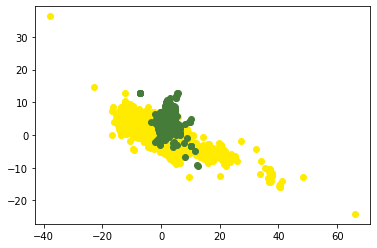

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111)
color={'0':'#ffeb00', '1': '#457c39'}
for i,k in enumerate(color.keys()):
  print(i)
  print(k)
  print(type(k), type(i))
  print(color[k])
  finalDf_temp = finalDf[finalDf['Class']==i]
  print(finalDf_temp.head())
  #ax = fig.add_subplot(111, projection='3d')
  ax.scatter(finalDf_temp['principal_component_1'],finalDf_temp['principal_component_2'], c=color[k])
plt.show()


In [152]:
X_pca= finalDf[features].drop('Class',axis=1)
y_pca = finalDf['Class']

XP_train, XP_test, yP_train, yP_test = train_test_split(X_pca, y_pca, test_size=0.33, random_state=42)


686
Fitting 3 folds for each of 12 candidates, totalling 36 fits
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     93838
           1       0.02      0.86      0.04       149

    accuracy                           0.93     93987
   macro avg       0.51      0.90      0.50     93987
weighted avg       1.00      0.93      0.96     93987

[[87715  6123]
 [   21   128]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.0s finished


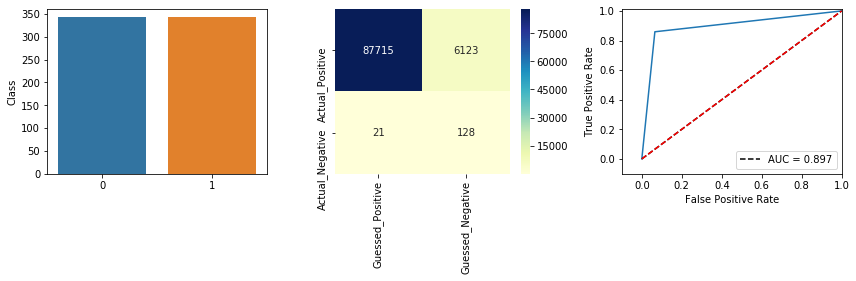

Area Under the Curve: 0.9


In [153]:
rus = RandomUnderSampler(random_state=0)
rus.fit(XP_train, yP_train)
X_pca, y_pca = rus.fit_resample(XP_train, yP_train)
print(len(X_pca))



logist_regression(X_pca, y_pca, "RANDOM UNDER-sampling",XP_test, yP_test)

0
0
<class 'str'> <class 'int'>
#ffeb00
   principal_component_1  principal_component_2  Class
0               0.125725              -0.479107      0
1               0.386067               0.531411      0
2               0.324796              -0.044122      0
3               0.995606               1.076000      0
4               0.113791               0.677320      0
1
1
<class 'str'> <class 'int'>
#457c39
      principal_component_1  principal_component_2  Class
541                0.739444               2.272330      1
623                0.299577               1.388307      1
4920               0.696173               0.362007      1
6108               4.406050               1.991300      1
6329               3.698710               5.729770      1


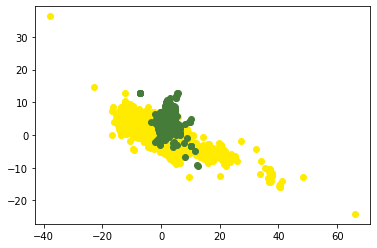

In [154]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
color={'0':'#ffeb00', '1': '#457c39'}
for i,k in enumerate(color.keys()):
  print(i)
  print(k)
  print(type(k), type(i))
  print(color[k])
  finalDf_temp = finalDf[finalDf['Class']==i]
  print(finalDf_temp.head())
  #ax = fig.add_subplot(111, projection='3d')
  ax1.scatter(finalDf_temp['principal_component_1'],finalDf_temp['principal_component_2'], c=color[k])
plt.show()


In [155]:
#### EFFECT OF t-SME on MODEL PERFORMANCE
model = TSNE(n_components=2) #n_components means the lower dimension
low_dim_data = model.fit_transform(X)